In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import PIL


In [3]:
import os 
print(os.listdir("input"))

path_train = os.listdir("input/train")
path_test = os.listdir("input/test")

['.DS_Store', 'test', 'sample_submission_v2.csv', 'train', 'train_ship_segmentations_v2.csv']


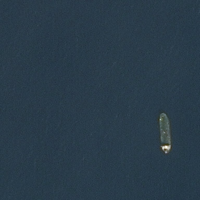

In [4]:
first_image = str(path_train[220])
PIL.Image.open("input/train/" + first_image).resize((200, 200))

In [5]:
# Import the dataframe with segmentation data which represents the masks
df_train_segm = pd.read_csv("input/train_ship_segmentations_v2.csv", index_col=0).dropna()
print(df_train_segm.head())
train_ids = df_train_segm.index.values

                                                   EncodedPixels
ImageId                                                         
000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...


Text(0.5, 1.0, 'Training dataset')

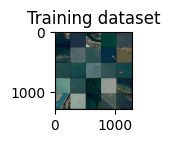

In [6]:
h = 5
w = 5
tile_height = 256 
tile_width = 256 
gap = 2

train_ids_rand = list(train_ids)
random.shuffle(train_ids_rand)


def load_img(filename):
    try:
        img = np.array(PIL.Image.open("input/train/" + filename).resize((tile_height, tile_width)))
        return img
    except:
        print("Error loading image: " + filename)
        return np.zeros((tile_height, tile_width, 3), dtype=np.uint8)

#3 dimensions is RGB
complete_image = np.zeros((h*(tile_height + gap), w*(tile_width + gap), 3), dtype=np.uint8)

#Loading images
img_index = 0
for i in range(h):
    y_start = i*(tile_height + gap)
    y_end = y_start + tile_height
    for j in range(w):
        x_start = j*(tile_width + gap)
        x_end = x_start + tile_width
        if img_index < len(train_ids):
            img = load_img(str(train_ids_rand[img_index]))
            complete_image[y_start:y_end, x_start:x_end, :] = img
            img_index += 1

plt.figure(figsize=(1, 1))
plt.imshow(complete_image)
plt.title("Training dataset")


In [18]:
df_train_segm.head()

def rle_decode(rle_code):
    rle_code = [int(i) for i in rle_code.split()]
    start_vals = rle_code[0:-1:2] #Start element:stop element:step
    end_vals = rle_code[1::2] #No stop element, so it will go to the end
    
    start_end = list(zip(start_vals, end_vals)) 
    # Calculate the x and y position of the pixel
    mask = [(pixel_pos % 768, pixel_pos // 768) for start, end in start_end for pixel_pos in range(start, start + end)] # For every pixel from the start point to the end point

    return mask

img_index = 0
for i in range(h): 
    y_start = i*(tile_height + gap)
    y_end = y_start + tile_height
    for j in range(w):
        x_start = j*(tile_width + gap)
        x_end = x_start + tile_width
        if img_index < len(train_ids):
            decoded_masks = np.zeros((768, 768)) # Emty array of zeros in which the decoded mask will be stored
            img_rle = str(df_train_segm.loc[train_ids_rand[img_index], "EncodedPixels"]).split()  # Accessing Encoded pixels of the current image and converting to list in case there are multiple masks
            
            print(img_rle)
            
            # for rle in img_rle:
            #     decoded_masks += rle_decode(rle)

            img = load_img(str(train_ids_rand[img_index]))
            complete_image[y_start:y_end, x_start:x_end, :] = img
            img_index += 1

['ImageId', '52deed575.jpg', '362659', '4', '363427', '8', '364195', '8', '364962', '9', '365730', '8', '3...', '52deed575.jpg', '353345', '2', '354111', '4', '354879', '5', '355647', '5', '356416', '5', '3...', '52deed575.jpg', '368016', '2', '368782', '4', '369551', '4', '370319', '4', '371088', '1', '52deed575.jpg', '314926', '4', '315694', '8', '316462', '8', '317230', '8', '52deed575.jpg', '335713', '1', '336479', '3', '337246', '5', '338014', '5', '338783', '5', '3...', '52deed575.jpg', '351053', '2', '351819', '5', '352586', '6', '353355', '6', '354123', '6', '3...', '52deed575.jpg', '347184', '5', '347952', '5', '348720', '5', '349488', '4', '350258', '2', '52deed575.jpg', '342640', '4', '343408', '4', '344176', '4', '344944', '4', '345712', '4', '52deed575.jpg', '344934', '5', '345702', '5', '346470', '5', '347237', '5', '348005', '5', '52deed575.jpg', '332668', '2', '333436', '4', '334203', '5', '334971', '5', '335738', '5', '3...', '52deed575.jpg', '341037', '8', '341805', '